# Load data

In [21]:
import pandas as pd
import numpy as np

label2idx = {'무증상' : 0, '결막염' : 1, '궤양성각막질환' : 2 , '백내장' : 3 , '비궤양성각막질환' : 4,
               '색소침착성각막염' : 5, '안검내반증' : 6, '안검염' : 7, '안검종양' : 8, '유루증' : 9, '핵경화' : 10}
idx2label = {0: '무증상', 1: '결막염', 2: '궤양성각막질환', 3: '백내장', 4: '비궤양성각막질환',
               5: '색소침착성각막염', 6: '안검내반증', 7: '안검염', 8: '안검종양', 9: '유루증', 10: '핵경화'}

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
base_load = '/content/drive/MyDrive/image_recognition/data/sample/t_u'
base_load_m = '/content/drive/MyDrive/image_recognition/data/sample/t_m'

img_1 = pd.read_pickle(base_load + '/결막염_images_224_900.pickle')
img_2 = pd.read_pickle(base_load + '/궤양성각막질환_images_224_900.pickle')
img_3 = pd.read_pickle(base_load + '/백내장_images_224_900.pickle')
img_4 = pd.read_pickle(base_load + '/비궤양성각막질환_images_224_900.pickle')
img_5 = pd.read_pickle(base_load + '/색소침착성각막염_images_224_900.pickle')
img_6 = pd.read_pickle(base_load + '/안검내반증_images_224_900.pickle')
img_7 = pd.read_pickle(base_load + '/안검염_images_224_900.pickle')
img_8 = pd.read_pickle(base_load + '/안검종양_images_224_900.pickle')
img_9 = pd.read_pickle(base_load + '/유루증_images_224_900.pickle')
img_10 = pd.read_pickle(base_load + '/핵경화_images_224_900.pickle')

img_11 = pd.read_pickle(base_load_m + '/결막염_images_224_100.pickle')
img_12 = pd.read_pickle(base_load_m + '/궤양성각막질환_images_224_100.pickle')
img_13 = pd.read_pickle(base_load_m + '/백내장_images_224_100.pickle')
img_14 = pd.read_pickle(base_load_m + '/비궤양성각막질환_images_224_100.pickle')
img_15 = pd.read_pickle(base_load_m + '/색소침착성각막염_images_224_100.pickle')
img_16 = pd.read_pickle(base_load_m + '/안검내반증_images_224_100.pickle')
img_17 = pd.read_pickle(base_load_m + '/안검염_images_224_100.pickle')
img_18 = pd.read_pickle(base_load_m + '/안검종양_images_224_100.pickle')
img_19 = pd.read_pickle(base_load_m + '/유루증_images_224_100.pickle')
img_20 = pd.read_pickle(base_load_m + '/핵경화_images_224_100.pickle')

In [4]:
# img_15.shape

In [5]:
# img_12.shape (200, 224, 224, 3)
# img_13.shape (300, 224, 224, 3)
# img_14.shape (200, 224, 224, 3)

In [6]:
img = np.concatenate((img_1, img_2, img_3, img_4, img_5, img_6, img_7, img_8, img_9, img_10,
                      img_11, img_12, img_13, img_14, img_15, img_16, img_17, img_18, img_19, img_20))

print('img_shape : ', img.shape)

img_shape :  (10000, 224, 224, 3)


In [7]:
# np.full(num, a) -> a로 num개만큼 채운 numpy 리스트
label = np.concatenate((np.full(900, 1), np.full(900, 2), np.full(900, 3), np.full(900, 4), np.full(900, 5),
                        np.full(900, 6), np.full(900, 7), np.full(900, 8), np.full(900, 9), np.full(900, 10),
                        np.full(1000, 0)))
print('label_shape : ', label.shape)

label_shape :  (10000,)


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(img, label, train_size= 0.8)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 224, 224, 3), (2000, 224, 224, 3), (8000,), (2000,))

In [9]:
# model = deep_cnn(X_train.shape)

# model_name = 'deep_ver' + datetime.datetime.now().strftime("%m%d%H%M")
# current_time = datetime.datetime.now().strftime("%Y%m%d") 
# print(model_name)

#  Load model

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [23]:
from keras.layers import BatchNormalization, Dropout
def cnn_advanced():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization()) # 배치 정규화
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))  # overfit 방지, 수 조정하기
    model.add(Dense(11, activation = 'softmax', kernel_initializer='he_normal'))


    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [24]:
model = cnn_advanced()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 50)      1400      
                                                                 
 batch_normalization_12 (Bat  (None, 224, 224, 50)     200       
 chNormalization)                                                
                                                                 
 activation_12 (Activation)  (None, 224, 224, 50)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 224, 224, 50)      22550     
                                                                 
 batch_normalization_13 (Bat  (None, 224, 224, 50)     200       
 chNormalization)                                                
                                                                 
 activation_13 (Activation)  (None, 224, 224, 50)     

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
# ReduceLROnPlateau EarlyStopping  같이 써보기

# ReduceLROnPlateau 콜백은 모델의 성능이 개선되지 않을 때 학습률을 감소시키는 기능을 제공
# EarlyStopping 콜백은 모델이 더 이상 개선되지 않을 때 학습을 조기 종료

In [ ]:
# 설명

# val_loss: 검증 데이터셋에 대한 손실 함수 값. 이 값이 줄어들 때마다 학습률을 감소시키는 등의 조치를 취함

# factor: 학습률을 감소시키는 비율. 
# factor=0.2는 학습률을 현재 학습률의 0.2배로 줄인다

# patience: 학습률을 조절하지 않고 기다리는 epoch 수
# patience=5는 검증 데이터셋에 대한 손실 함수 값이 5 epoch 동안 개선되지 않으면 학습률을 감소

# min_lr: 학습률을 줄일 수 있는 최소값, min_lr=1e-7은 학습률이 이 값을 넘지 않도록 함

# restore_best_weights: 최적의 가중치를 복원할지 여부 결정,
# True로 설정하면 학습 중 가장 검증 성능이 좋았을 때의 가중치를 저장하고 학습이 끝난 후 이 가중치로 복원
# False로 설정하면 마지막 학습 결과의 가중치를 사용합니다.

In [ ]:
# 나중에 실행시켜보기 
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-7)
es = EarlyStopping(monitor='val_loss', patience= 5, restore_best_weights= True)

history = model.fit(X_train, y_train, batch_size = 64, validation_split = 0.2, epochs = 3, verbose = 1, callbacks=[lr, es])

Epoch 1/3
  4/100 [>.............................] - ETA: 54:45 - loss: 16.2049 - accuracy: 0.0820

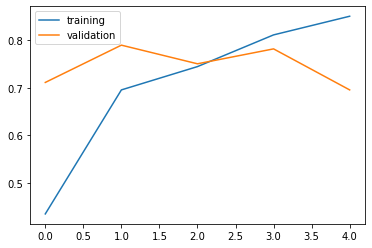

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

5/5 [==============================] - 18s 4s/step - loss: 0.6552 - accuracy: 0.7500
Test accuracy:  0.75


# Model inference

In [ ]:
# def resize(img, img_size):
#   if(img.shape[1] > img.shape[0]) : 
#     ratio = img_size/img.shape[1]
#   else :
#     ratio = img_size/img.shape[0]

#   img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_LINEAR) # interpolation : 고간법 - 주변을 참고해서 채움

#   return img

# def padding(img, img_size):
#   w, h = img.shape[1], img.shape[0]

#   dw = (img_size-w)/2 # img_size와 w의 차이
#   dh = (img_size-h)/2 # img_size와 h의 차이

#   M = np.float32([[1,0,dw], [0,1,dh]])  #(2*3 이차원 행렬)
#   img_re = cv2.warpAffine(img, M, (img_size, img_size))

#   return img_re

In [ ]:
# import cv2

# def check(path):
#     IMG_SIZE = 224

#     img_array = np.fromfile(path, np.uint8)
#     img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

#     img_re = resize(img, IMG_SIZE)
#     img_pre = padding(img_re, IMG_SIZE)

#     img_pre = np.array(img_pre)
#     img_pre = img_pre.reshape(1, IMG_SIZE, IMG_SIZE, 3)
#     output = model.predict(img_pre)
#     max_idx = np.argmax(output)
#     name = path.split('/')[-1]
#     rate = output[0][max_idx]

#     print(f'{name}을 살펴본 결과,')

#     if max_idx:
#         print(f'{idx2label[max_idx]}이(가) 의심됩니다.')
#         print(f'rate: {rate}')
#     else:
#         print('정상입니다.')

In [ ]:
# import os

In [ ]:
# paths = os.listdir('/content/drive/MyDrive/alpaco/team_project/pet/samples')
# print(paths)
# for path in paths[4:]:
    
#     full_path = '/content/drive/MyDrive/alpaco/team_project/pet/samples/' + path
#     check(full_path)

['t_u', 't_m', 'v_u', 'v_m', '백내장_u.jpg', '백내장_m.png', '결막염_u.jpg', '유루증_u.jpg']
1/1 [==============================] - 0s 215ms/step
백내장_u.jpg을 살펴본 결과,
백내장이(가) 의심됩니다.
rate: 0.6473599672317505
1/1 [==============================] - 0s 208ms/step
백내장_m.png을 살펴본 결과,
정상입니다.
1/1 [==============================] - 0s 120ms/step
결막염_u.jpg을 살펴본 결과,
백내장이(가) 의심됩니다.
rate: 0.694605827331543
1/1 [==============================] - 0s 121ms/step
유루증_u.jpg을 살펴본 결과,
정상입니다.
